In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

train = pd.read_csv('adult.data', names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary'])
test = pd.read_csv('adult.test', skiprows=1, names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary'])

ss = dict(zip([' <=50K.', ' >50K.'],[' <=50K', ' >50K']))
ssp = dict(zip([' <=50K', ' >50K'],[0, 1]))
test['salary'] = test['salary'].apply(lambda x: ss[x])

train = train.drop_duplicates()
test = test.drop_duplicates()

df = pd.concat([train, test], axis=0)
df.replace(' ?',np.nan, inplace=True)
df['salBin'] = df['salary'].apply(lambda x: ssp[x])


print(train.shape)
print(test.shape)
print(df.shape)
df.dropna(inplace=True)

(32537, 15)
(16276, 15)
(48813, 16)


In [27]:
educD = {' Preschool': ' Dropout', ' 1st-4th': ' Dropout', ' 5th-6th':' Dropout', ' 7th-8th':' Dropout', ' 9th':' Dropout', ' 10th':' Dropout', ' 11th':' Dropout', ' 12th':' Dropout', ' Some-college':' College', ' Assoc-voc':' Associate', ' Assoc-acdm':' Associate', ' Bachelors':' Bachelors', ' Masters': 'Masters', ' Doctorate':' Doctorate', ' Prof-school':' Prof-school', ' HS-grad':' HS-grad'}
df['education_lvl'] = df['education'].apply(lambda x: educD[x])

# Created a dict to map countries to regions
ncoD = dict.fromkeys([" Cambodia", " China", ' Philippines', " Hong", " Laos", " Thailand", " Japan", " Taiwan", " Vietnam"], ' Asia-East')
ncoD.update(dict.fromkeys([" India", " Iran"], ' Asia-Central'))
ncoD.update(dict.fromkeys([" Cuba", " Guatemala", " Jamaica", " Nicaragua", " Puerto-Rico",  " Dominican-Republic", " El-Salvador", " Haiti", " Honduras", " Mexico", " Trinadad&Tobago"], ' Central-America'))
ncoD.update(dict.fromkeys([" Ecuador", " Peru", " Columbia"], ' South-America'))
ncoD.update(dict.fromkeys([" England", " Germany", " Holand-Netherlands", " Ireland", " France", " Greece", " Italy", " Portugal", " Scotland"], ' Europe-West'))
ncoD.update(dict.fromkeys([" Poland", " Yugoslavia", " Hungary"], ' Europe-East'))
ncoD.update(dict.fromkeys([" United-States", " Outlying-US(Guam-USVI-etc)", " Canada"], ' North-America'))
ncoD.update(dict.fromkeys([' South'], ' South-Africa'))

# Created new column 'native-region'
df['native-region'] = df['native-country'].apply(lambda x: ncoD[x])

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salBin,education_lvl,native-region
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,Bachelors,North-America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,Bachelors,North-America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,HS-grad,North-America
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,Dropout,North-America
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,Bachelors,Central-America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,0,Bachelors,North-America
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,0,Bachelors,North-America
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,0,Bachelors,North-America
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,0,Bachelors,North-America


In [66]:
for i in df.columns:
    print('Column: ',i)
    print(df[i].value_counts(),'\n\n')

Column:  age
36    1283
33    1279
31    1274
35    1271
23    1240
      ... 
85       5
88       5
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64 


Column:  workclass
 Private             33281
 Self-emp-not-inc     3795
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1645
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64 


Column:  fnlwgt
203488    21
120277    18
125892    18
113364    17
126569    17
          ..
117162     1
186790     1
135601     1
262579     1
208174     1
Name: fnlwgt, Length: 26741, dtype: int64 


Column:  education
 HS-grad         14777
 Some-college     9890
 Bachelors        7565
 Masters          2513
 Assoc-voc        1958
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           822
 Prof-school       785
 9th               676
 12th              576
 Doctorate         544
 5th-6th           448
 1st-4th           220
 Preschool        

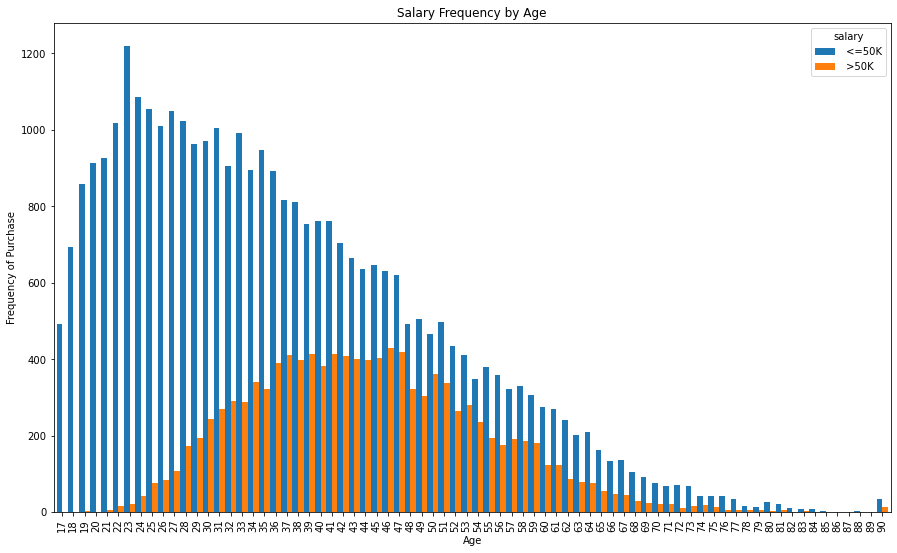

0.017556134752117612
0.1324995651016169


In [29]:
ag = df[['age','salary', 'salBin']]

x = pd.concat([ag.groupby('age').mean(),ag.groupby('age').count()],axis=1)
x.drop(['salary'],axis=1, inplace=True)
x.columns = ['probability', 'count']

table = pd.crosstab(ag['age'],ag['salary'])
table.plot(kind='bar', figsize=(15, 9), width=1)
plt.title('Salary Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Purchase')
plt.show()

print(ag.groupby('age').mean()['salBin'].var())
print(ag.groupby('age').mean()['salBin'].std())


<Figure size 1080x720 with 0 Axes>

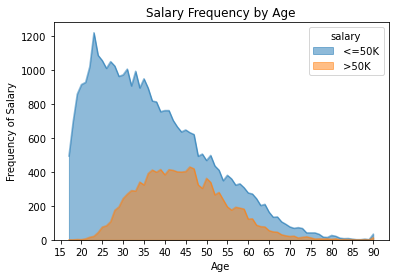

In [38]:
#table[' <=50K'].plot(kind='bar', figsize=(15, 9))
#table[' >50K'].plot(kind='bar', figsize=(15, 9))
f = plt.figure() 
f.set_figwidth(15) 
f.set_figheight(10)

table.plot(kind='area', stacked=False, xticks=range(min(table.index)-2,max(table.index)+5,5))
plt.title('Salary Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Salary')
plt.show()

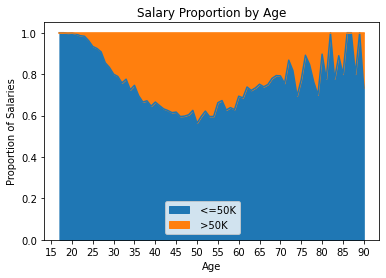

In [37]:
table=pd.crosstab(df['age'],df['salary'])
#table['probability'] = x['probability']
graph = table[[' <=50K', ' >50K']]
graph.div(graph.sum(1).astype(float), axis=0).plot(kind='area', stacked=True, xticks=range(min(table.index)-2,max(table.index)+5,5)).legend(bbox_to_anchor=(0.6, 0.2))
plt.title('Salary Proportion by Age')
plt.xlabel('Age')
plt.ylabel('Proportion of Salaries')
plt.show()

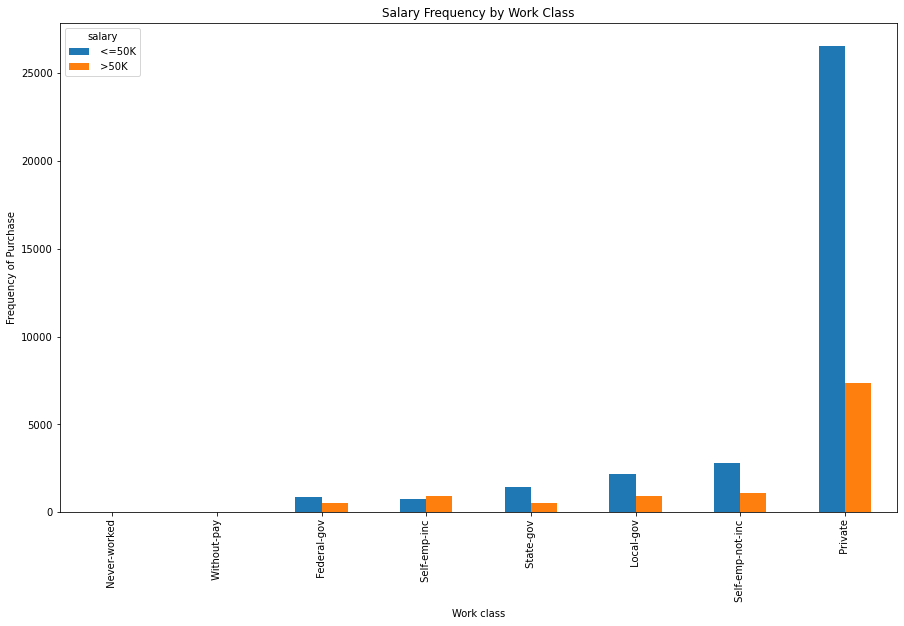

0.02882465413320293
0.16977824988261284


salary,<=50K,>50K,count
workclass,,,
Never-worked,10,0,10
Without-pay,19,2,21
Federal-gov,871,561,1432
Self-emp-inc,756,938,1694
State-gov,1451,530,1981
Local-gov,2209,927,3136
Self-emp-not-inc,2784,1077,3861
Private,26494,7385,33879


In [22]:
wc = df[['workclass','salary', 'salBin']]

x = pd.concat([wc.groupby('workclass').mean(),wc.groupby('workclass').count()],axis=1)
x.drop(['salary'],axis=1, inplace=True)
x.columns = ['probability', 'count']

table = pd.crosstab(wc['workclass'],wc['salary'])
table['count'] = x['count']
table.sort_values('count', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.plot(kind='bar', figsize=(15, 9))
plt.title('Salary Frequency by Work Class')
plt.xlabel('Work class')
plt.ylabel('Frequency of Purchase')
plt.show()

print(wc.groupby('workclass').mean()['salBin'].var())
print(wc.groupby('workclass').mean()['salBin'].std())
table

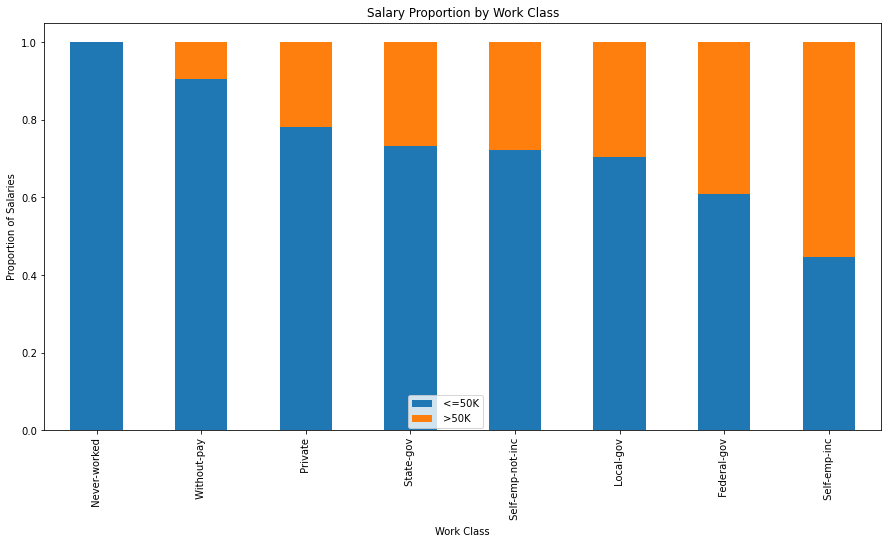

salary,<=50K,>50K,probability
workclass,,,
Never-worked,10,0,0.000000
Without-pay,19,2,0.095238
Private,26494,7385,0.217982
State-gov,1451,530,0.267542
Self-emp-not-inc,2784,1077,0.278943
Local-gov,2209,927,0.295599
Federal-gov,871,561,0.391760
Self-emp-inc,756,938,0.553719


In [23]:
table=pd.crosstab(df['workclass'],df['salary'])
table['probability'] = x['probability']
table.sort_values('probability', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.div(graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 7.5)).legend(bbox_to_anchor=(0.53, 0.1))
plt.title('Salary Proportion by Work Class')
plt.xlabel('Work Class')
plt.ylabel('Proportion of Salaries')
plt.show()
table

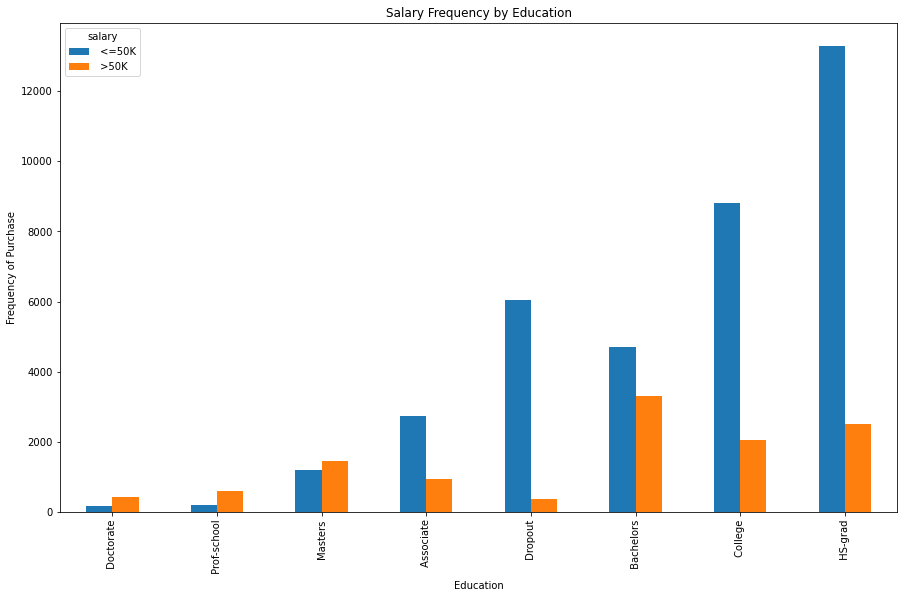

salary,<=50K,>50K,count
education,,,
Doctorate,163,431,594
Prof-school,217,617,834
Masters,1197,1459,2656
Associate,2726,935,3661
Dropout,6036,366,6402
Bachelors,4707,3313,8020
College,8807,2062,10869
HS-grad,13275,2502,15777


In [27]:
ed = df[['education','salary', 'salBin']]

x = pd.concat([ed.groupby('education').mean(),ed.groupby('education').count()],axis=1)
x.drop(['salary'],axis=1, inplace=True)
x.columns = ['probability', 'count']

table = pd.crosstab(ed['education'],ed['salary'])
table['count'] = x['count']
table.sort_values('count', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.plot(kind='bar', figsize=(15, 9))
plt.title('Salary Frequency by Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')
plt.show()

table

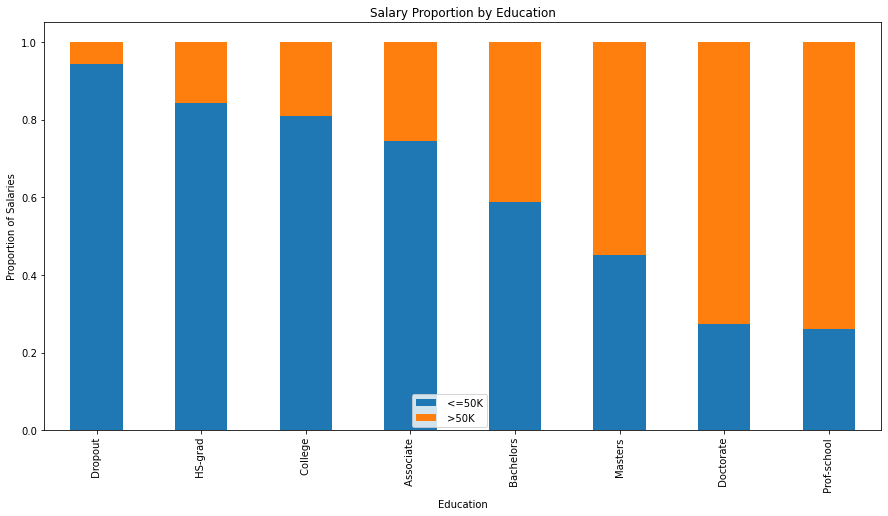

salary,<=50K,>50K,probability
education,,,
Dropout,6036,366,0.057170
HS-grad,13275,2502,0.158585
College,8807,2062,0.189714
Associate,2726,935,0.255395
Bachelors,4707,3313,0.413092
Masters,1197,1459,0.549322
Doctorate,163,431,0.725589
Prof-school,217,617,0.739808


In [32]:
table=pd.crosstab(df['education'],df['salary'])
table['probability'] = x['probability']
table.sort_values('probability', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.div(graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 7.5)).legend(bbox_to_anchor=(0.535, 0.1))
plt.title('Salary Proportion by Education')
plt.xlabel('Education')
plt.ylabel('Proportion of Salaries')
plt.show()
table

In [11]:

table.sort_index()

salary,<=50K,>50K,probability
education,,,
10th,1302,87,0.062635
11th,1720,92,0.050773
12th,608,48,0.073171
1st-4th,237,8,0.032653
5th-6th,481,27,0.053150
7th-8th,892,62,0.064990
9th,715,41,0.054233
Assoc-acdm,1188,413,0.257964
Assoc-voc,1538,522,0.253398


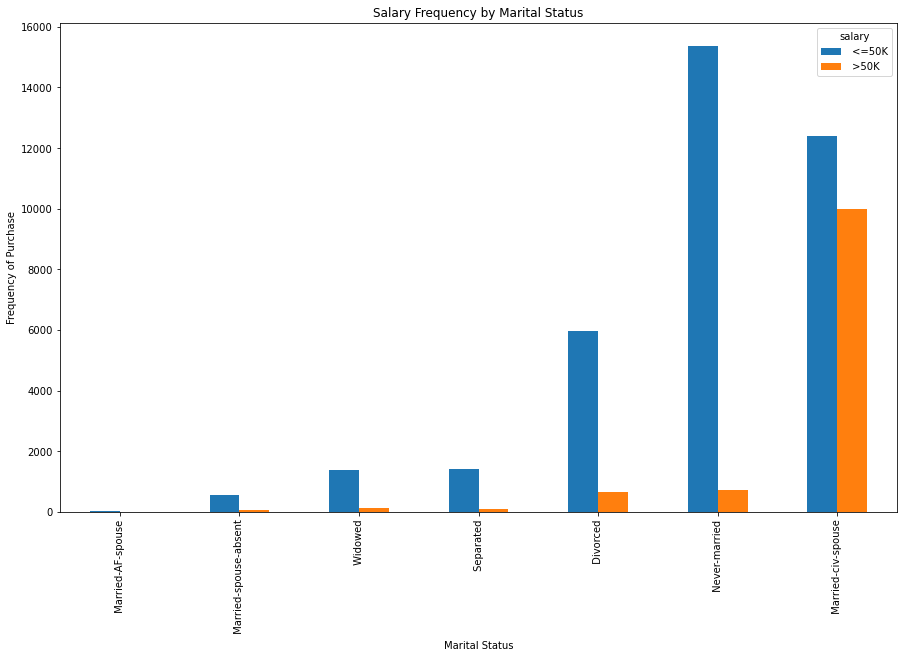

salary,<=50K,>50K,count
marital-status,,,
Married-AF-spouse,23,14,37
Married-spouse-absent,570,58,628
Widowed,1390,128,1518
Separated,1431,99,1530
Divorced,5959,671,6630
Never-married,15365,733,16098
Married-civ-spouse,12390,9982,22372


In [11]:
ms = df[['marital-status','salary', 'salBin']]

x = pd.concat([ms.groupby('marital-status').mean(),ms.groupby('marital-status').count()],axis=1)
x.drop(['salary'],axis=1, inplace=True)
x.columns = ['probability', 'count']

table = pd.crosstab(ms['marital-status'],ms['salary'])
table['count'] = x['count']
table.sort_values('count', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.plot(kind='bar', figsize=(15, 9))
plt.title('Salary Frequency by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Purchase')
plt.show()

table

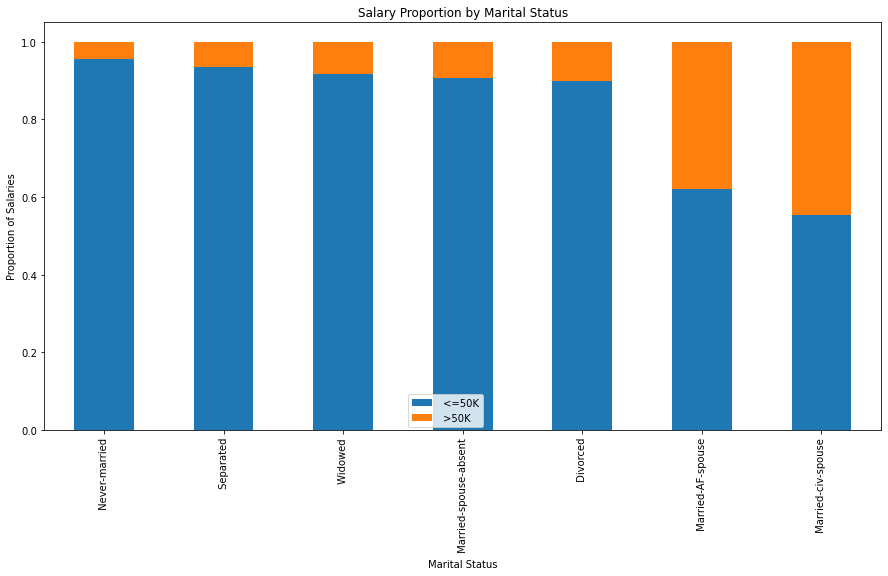

salary,<=50K,>50K,probability
marital-status,,,
Never-married,15365,733,0.045534
Separated,1431,99,0.064706
Widowed,1390,128,0.084321
Married-spouse-absent,570,58,0.092357
Divorced,5959,671,0.101207
Married-AF-spouse,23,14,0.378378
Married-civ-spouse,12390,9982,0.446183


In [12]:
table=pd.crosstab(df['marital-status'],df['salary'])
table['probability'] = x['probability']
table.sort_values('probability', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.div(graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 7.5)).legend(bbox_to_anchor=(0.53, 0.1))
plt.title('Salary Proportion by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Salaries')
plt.show()
table

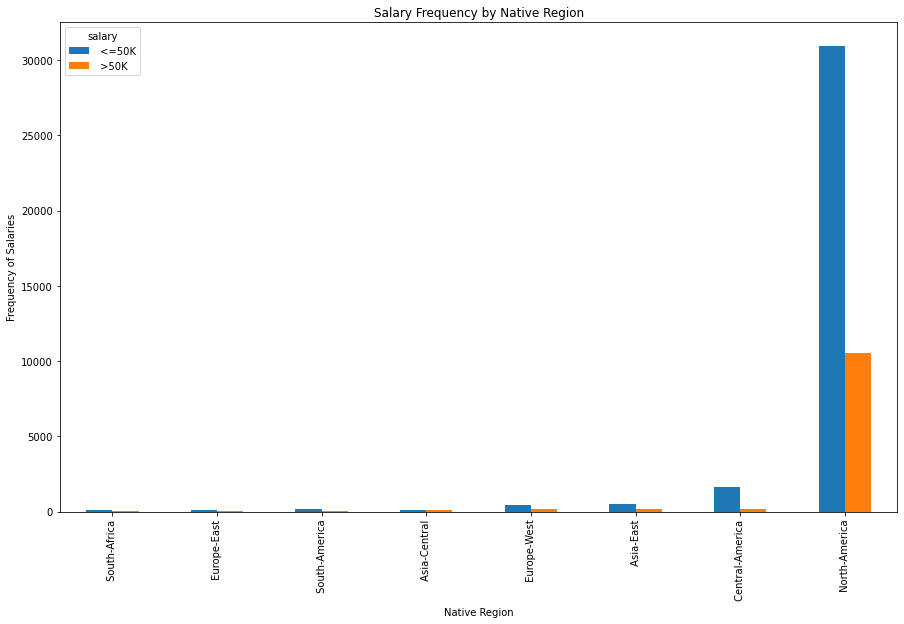

In [67]:
co = df[['native-region','salary', 'salBin']]

x = pd.concat([co.groupby('native-region').mean(),co.groupby('native-region').count()],axis=1)
x.drop(['salary'],axis=1, inplace=True)
x.columns = ['probability', 'count']

table = pd.crosstab(co['native-region'],co['salary'])
table['count'] = x['count']
table.sort_values('count', inplace=True)
#table.drop(' United-States', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.plot(kind='bar', figsize=(15, 9))
plt.title('Salary Frequency by Native Region')
plt.xlabel('Native Region')
plt.ylabel('Frequency of Salaries')
plt.show()

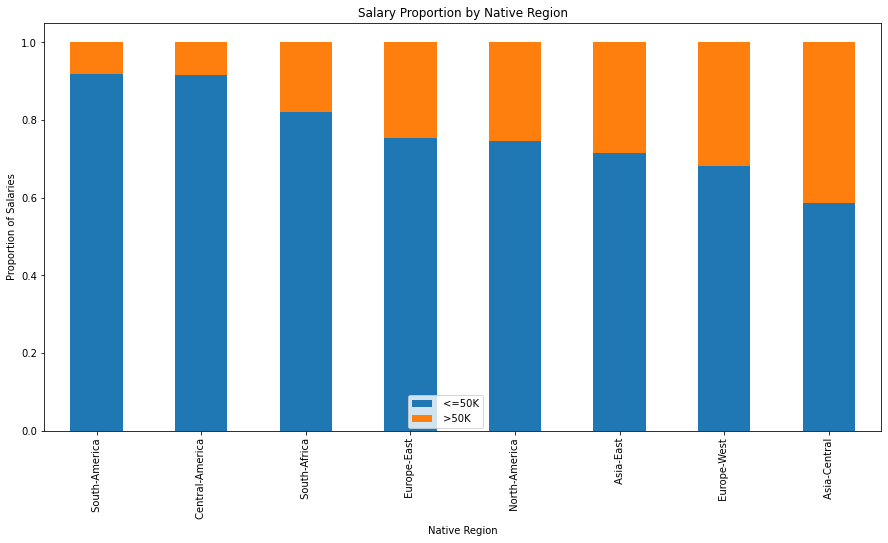

salary,<=50K,>50K,probability
native-region,,,
South-America,156,14,0.082353
Central-America,1650,150,0.083333
South-Africa,83,18,0.178218
Europe-East,92,30,0.245902
North-America,30948,10507,0.253456
Asia-East,520,207,0.284732
Europe-West,420,196,0.318182
Asia-Central,119,84,0.413793


In [68]:
table=pd.crosstab(df['native-region'],df['salary'])
table['probability'] = x['probability']
table.sort_values('probability', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.div(graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 7.5)).legend(bbox_to_anchor=(0.53, 0.1))
plt.title('Salary Proportion by Native Region')
plt.xlabel('Native Region')
plt.ylabel('Proportion of Salaries')
plt.show()
table

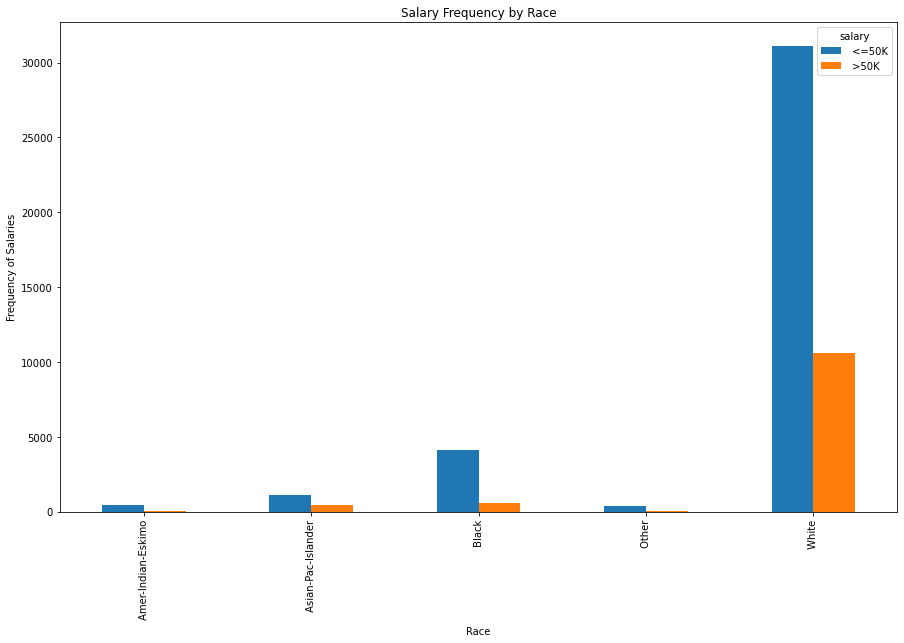

salary,<=50K,>50K,count
race,,,
Amer-Indian-Eskimo,415,55,470
Asian-Pac-Islander,1109,409,1518
Black,4117,566,4683
Other,356,50,406
White,31131,10605,41736


In [16]:
rac = df[['race','salary', 'salBin']]

x = pd.concat([rac.groupby('race').mean(),rac.groupby('race').count()],axis=1)
x.drop(['salary'],axis=1, inplace=True)
x.columns = ['probability', 'count']

table = pd.crosstab(rac['race'],rac['salary'])
table['count'] = x['count']
table.sort_values('race', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.plot(kind='bar', figsize=(15, 9))
plt.title('Salary Frequency by Race')
plt.xlabel('Race')
plt.ylabel('Frequency of Salaries')
plt.show()
table

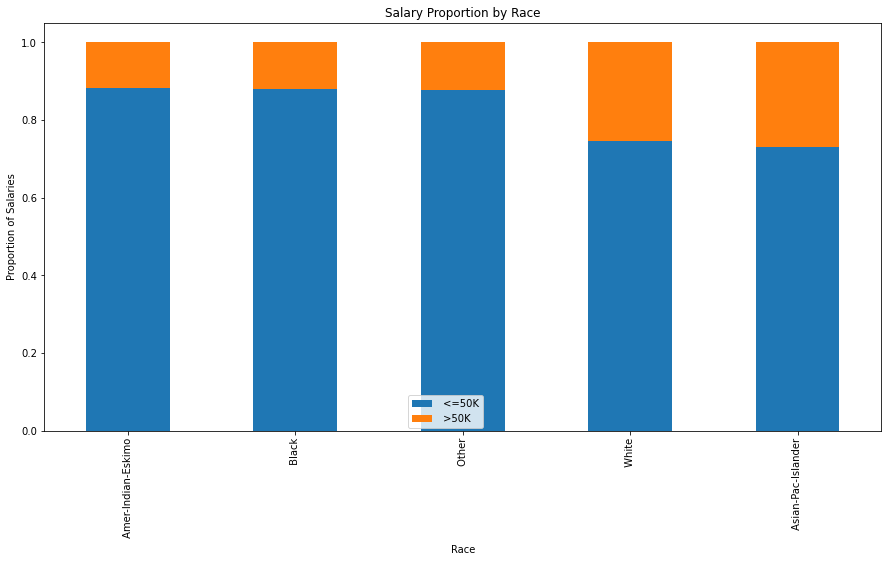

salary,<=50K,>50K,probability
race,,,
Amer-Indian-Eskimo,415,55,0.117021
Black,4117,566,0.120863
Other,356,50,0.123153
White,31131,10605,0.254097
Asian-Pac-Islander,1109,409,0.269433


In [17]:
table=pd.crosstab(df['race'],df['salary'])
table['probability'] = x['probability']
table.sort_values('probability', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.div(graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 7.5)).legend(bbox_to_anchor=(0.53, 0.1))
plt.title('Salary Proportion by Race')
plt.xlabel('Race')
plt.ylabel('Proportion of Salaries')
plt.show()
table

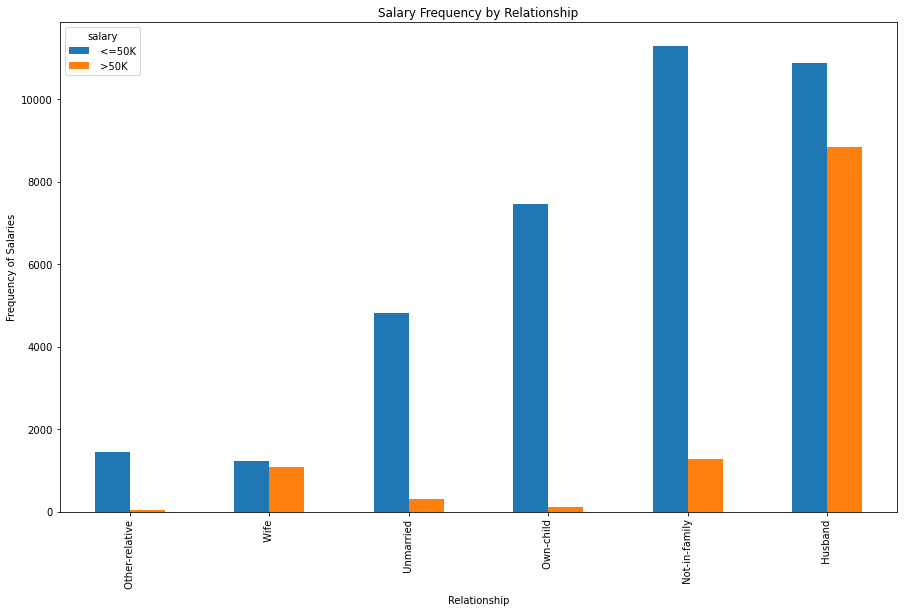

salary,<=50K,>50K,count
relationship,,,
Other-relative,1454,52,1506
Wife,1238,1093,2331
Unmarried,4815,309,5124
Own-child,7465,111,7576
Not-in-family,11291,1276,12567
Husband,10865,8844,19709


In [18]:
rel = df[['relationship','salary', 'salBin']]

x = pd.concat([rel.groupby('relationship').mean(),rel.groupby('relationship').count()],axis=1)
x.drop(['salary'],axis=1, inplace=True)
x.columns = ['probability', 'count']

table = pd.crosstab(rel['relationship'],rel['salary'])
table['count'] = x['count']
table.sort_values('count', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.plot(kind='bar', figsize=(15, 9))
plt.title('Salary Frequency by Relationship')
plt.xlabel('Relationship')
plt.ylabel('Frequency of Salaries')
plt.show()
table

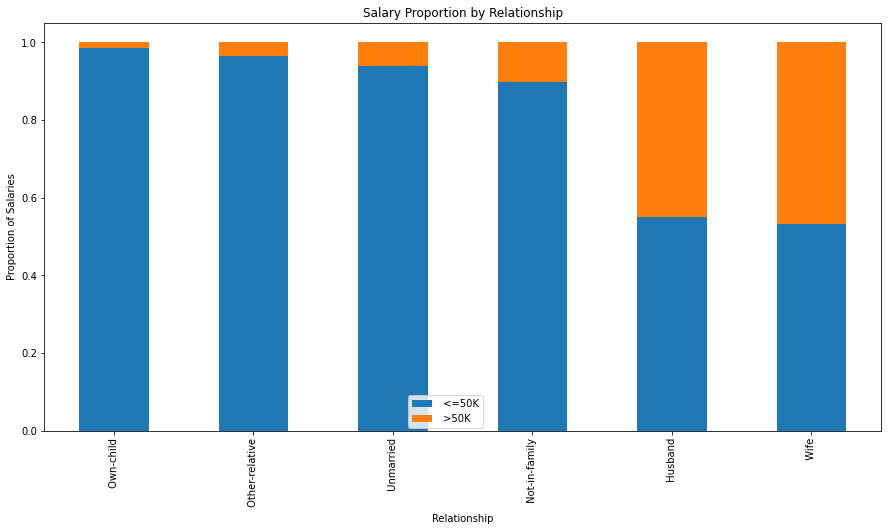

salary,<=50K,>50K,probability
relationship,,,
Own-child,7465,111,0.014652
Other-relative,1454,52,0.034529
Unmarried,4815,309,0.060304
Not-in-family,11291,1276,0.101536
Husband,10865,8844,0.448729
Wife,1238,1093,0.468897


In [19]:
table=pd.crosstab(df['relationship'],df['salary'])
table['probability'] = x['probability']
table.sort_values('probability', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.div(graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 7.5)).legend(bbox_to_anchor=(0.53, 0.1))
plt.title('Salary Proportion by Relationship')
plt.xlabel('Relationship')
plt.ylabel('Proportion of Salaries')
plt.show()
table

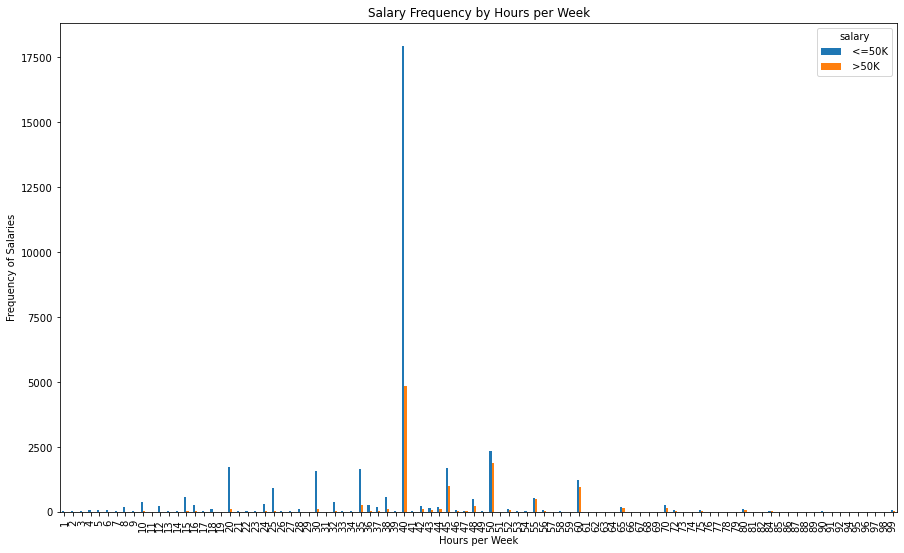

salary,<=50K,>50K,count
hours-per-week,,,
1,24,3,27
2,41,12,53
3,56,3,59
4,78,6,84
5,86,9,95
...,...,...,...
95,1,1,2
96,8,1,9
97,1,1,2


In [25]:
hpw = df[['hours-per-week','salary', 'salBin']]

x = pd.concat([hpw.groupby('hours-per-week').mean(),hpw.groupby('hours-per-week').count()],axis=1)
x.drop(['salary'],axis=1, inplace=True)
x.columns = ['probability', 'count']

table = pd.crosstab(hpw['hours-per-week'],hpw['salary'])
table['count'] = x['count']
#table.sort_values('count', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.plot(kind='bar', figsize=(15, 9))
plt.title('Salary Frequency by Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency of Salaries')
plt.show()

table

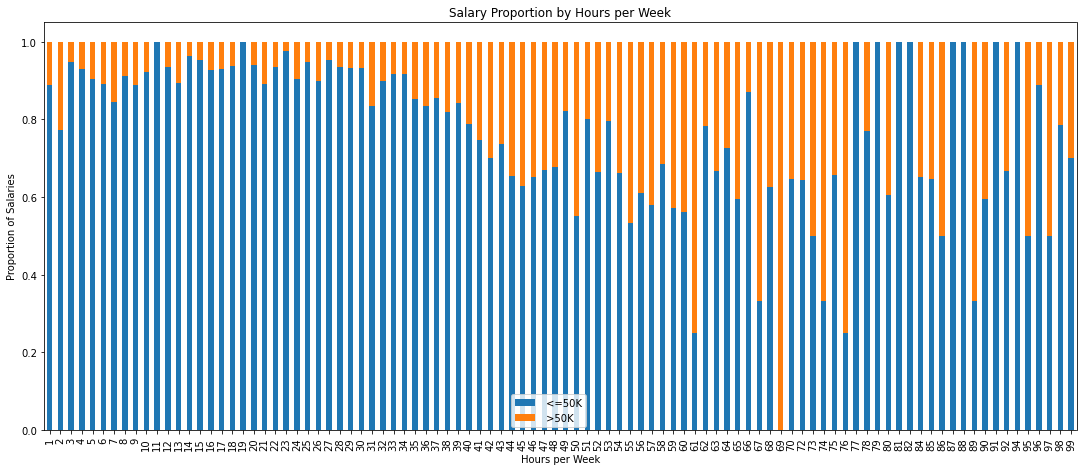

salary,<=50K,>50K,probability
hours-per-week,,,
1,24,3,NaN
2,41,12,NaN
3,56,3,NaN
4,78,6,NaN
5,86,9,NaN
...,...,...,...
95,1,1,NaN
96,8,1,NaN
97,1,1,NaN


In [35]:
table=pd.crosstab(df['hours-per-week'],df['salary'])
table['probability'] = x['probability']
#table.sort_values('probability', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.div(graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(18.5, 7.5)).legend(bbox_to_anchor=(0.53, 0.1))
plt.title('Salary Proportion by Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Proportion of Salaries')
plt.show()
table

In [27]:
table.loc[69]

salary
 <=50K    0
 >50K     1
count     1
Name: 69, dtype: int64

In [28]:
hpw.groupby('salary').mean()

,hours-per-week,salBin
salary,,
<=50K,38.842599,0.0
>50K,45.453145,1.0


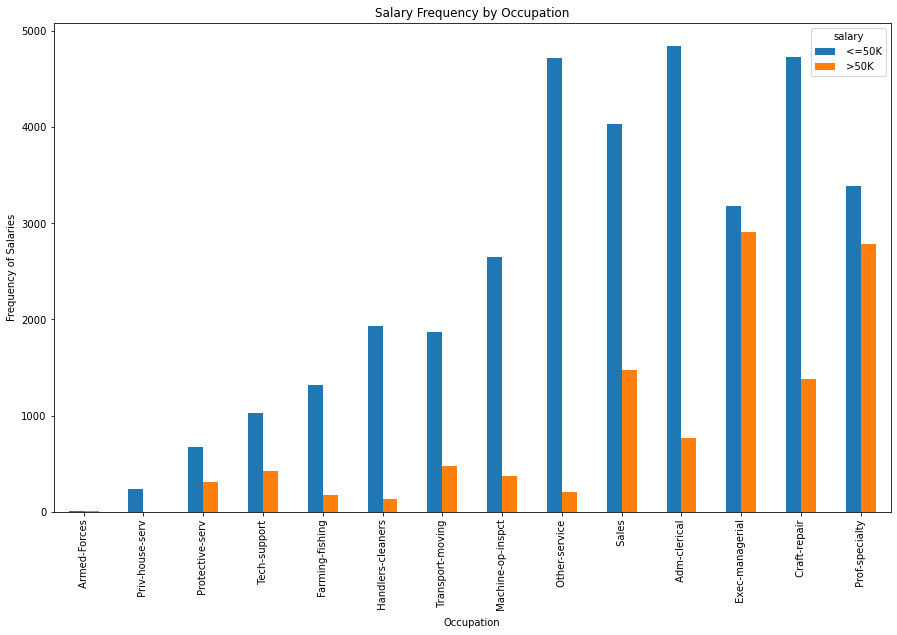

salary,<=50K,>50K,count
occupation,,,
Armed-Forces,10,5,15
Priv-house-serv,237,3,240
Protective-serv,675,308,983
Tech-support,1025,420,1445
Farming-fishing,1314,173,1487
Handlers-cleaners,1933,138,2071
Transport-moving,1874,481,2355
Machine-op-inspct,2648,371,3019
Other-service,4715,204,4919


In [29]:
occ = df[['occupation','salary', 'salBin']]

x = pd.concat([occ.groupby('occupation').mean(),occ.groupby('occupation').count()],axis=1)
x.drop(['salary'],axis=1, inplace=True)
x.columns = ['probability', 'count']

table = pd.crosstab(occ['occupation'],occ['salary'])
table['count'] = x['count']
table.sort_values('count', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.plot(kind='bar', figsize=(15, 9))
plt.title('Salary Frequency by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Frequency of Salaries')
plt.show()

table

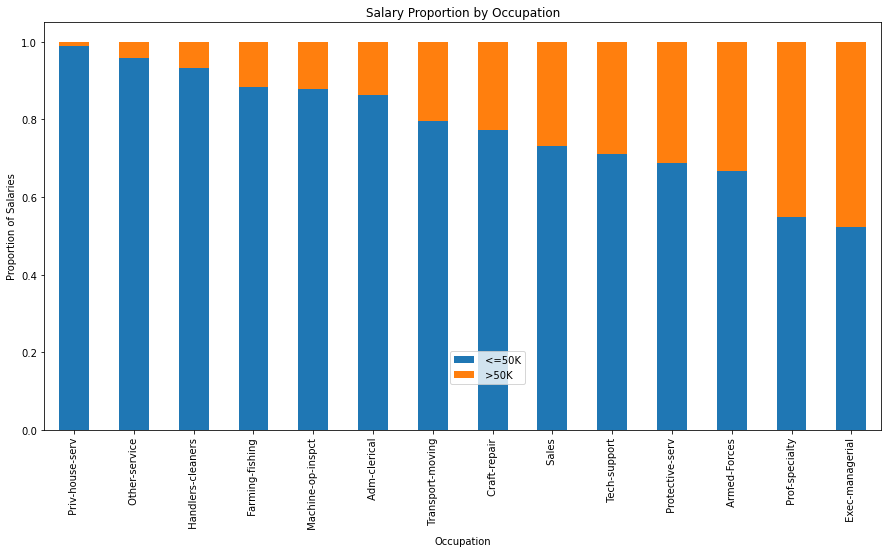

salary,<=50K,>50K,probability
occupation,,,
Priv-house-serv,237,3,0.012500
Other-service,4715,204,0.041472
Handlers-cleaners,1933,138,0.066634
Farming-fishing,1314,173,0.116342
Machine-op-inspct,2648,371,0.122888
Adm-clerical,4840,768,0.136947
Transport-moving,1874,481,0.204246
Craft-repair,4724,1383,0.226461
Sales,4029,1475,0.267987


In [30]:
table=pd.crosstab(df['occupation'],df['salary'])
table['probability'] = x['probability']
table.sort_values('probability', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.div(graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 7.5)).legend(bbox_to_anchor=(0.53, 0.1))
plt.title('Salary Proportion by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Proportion of Salaries')
plt.show()
table

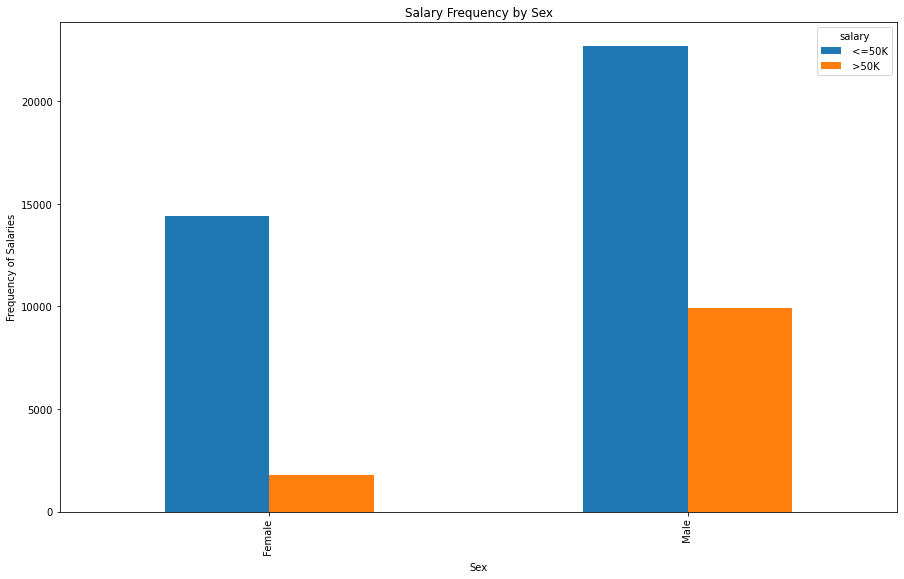

salary,<=50K,>50K,count
sex,,,
Female,14413,1769,16182
Male,22715,9916,32631


In [31]:
sx = df[['sex','salary', 'salBin']]

x = pd.concat([sx.groupby('sex').mean(),sx.groupby('sex').count()],axis=1)
x.drop(['salary'],axis=1, inplace=True)
x.columns = ['probability', 'count']

table = pd.crosstab(sx['sex'],sx['salary'])
table['count'] = x['count']
table.sort_values('count', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.plot(kind='bar', figsize=(15, 9))
plt.title('Salary Frequency by Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency of Salaries')
plt.show()

table

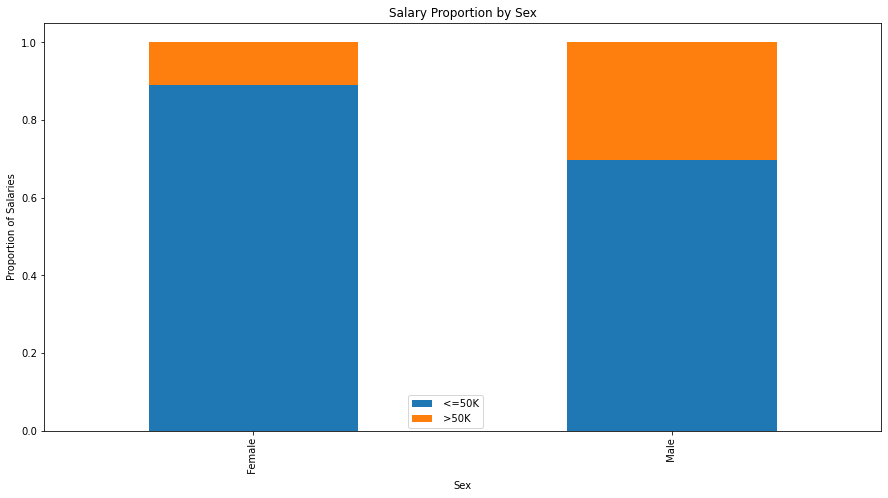

salary,<=50K,>50K,probability
sex,,,
Female,14413,1769,0.109319
Male,22715,9916,0.303883


In [32]:
table=pd.crosstab(df['sex'],df['salary'])
table['probability'] = x['probability']
table.sort_values('probability', inplace=True)

graph = table[[' <=50K', ' >50K']]
graph.div(graph.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 7.5)).legend(bbox_to_anchor=(0.53, 0.1))
plt.title('Salary Proportion by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion of Salaries')
plt.show()
table